In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib



data_dir = 'D:\Animal_photos'

In [3]:
batch_size = 32
img_height = 180
img_width = 180

#Training
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
 data_dir,
 validation_split=0.2,
 subset="training",
 seed=123,
 image_size=(img_height, img_width),
 batch_size=batch_size)

#Validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
 data_dir,
 validation_split=0.2,
 subset="validation",
 seed=123,
 image_size=(img_height, img_width),
 batch_size=batch_size)


Found 2423 files belonging to 3 classes.
Using 1939 files for training.
Found 2423 files belonging to 3 classes.
Using 484 files for validation.


In [4]:
class_names = train_ds.class_names
print(class_names)

['bear', 'horse', 'zebra']


In [5]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [8]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))
num_classes = 3

0.0027232452 1.0


In [15]:
#CNN

model = Sequential([
 layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height,
img_width, 3)),
 layers.Conv2D(16, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(num_classes)
])



In [16]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 45, 45, 64)       

In [17]:
epochs=10
history = model.fit(
 train_ds,
 validation_data=val_ds,
 epochs=epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

Epoch 1/10
61/61 [==============================] - 15s 24ms/step - loss: 1.1168 - accuracy: 0.4513 - val_loss: 1.0155 - val_accuracy: 0.4525
Epoch 2/10
61/61 [==============================] - 1s 13ms/step - loss: 0.8996 - accuracy: 0.5745 - val_loss: 0.8168 - val_accuracy: 0.6281
Epoch 3/10
61/61 [==============================] - 1s 13ms/step - loss: 0.7527 - accuracy: 0.6777 - val_loss: 0.7862 - val_accuracy: 0.6364
Epoch 4/10
61/61 [==============================] - 1s 13ms/step - loss: 0.6347 - accuracy: 0.7421 - val_loss: 0.7545 - val_accuracy: 0.6674
Epoch 5/10
61/61 [==============================] - 1s 13ms/step - loss: 0.4865 - accuracy: 0.8097 - val_loss: 0.8419 - val_accuracy: 0.6322
Epoch 6/10
61/61 [==============================] - 1s 13ms/step - loss: 0.3842 - accuracy: 0.8577 - val_loss: 0.8429 - val_accuracy: 0.6591
Epoch 7/10
61/61 [==============================] - 1s 13ms/step - loss: 0.2748 - accuracy: 0.9087 - val_loss: 1.0821 - val_accuracy: 0.6322
Epoch 8/10
6

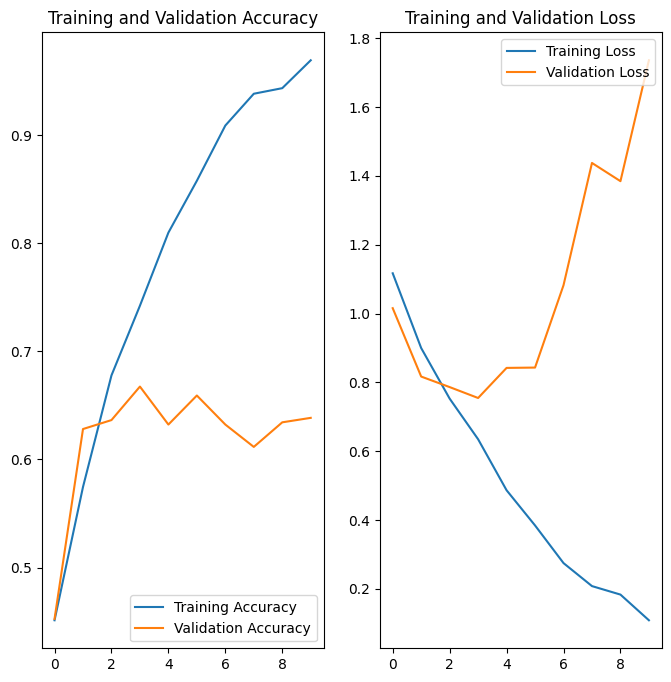

In [18]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

(32, 180, 180, 3)
(32,)


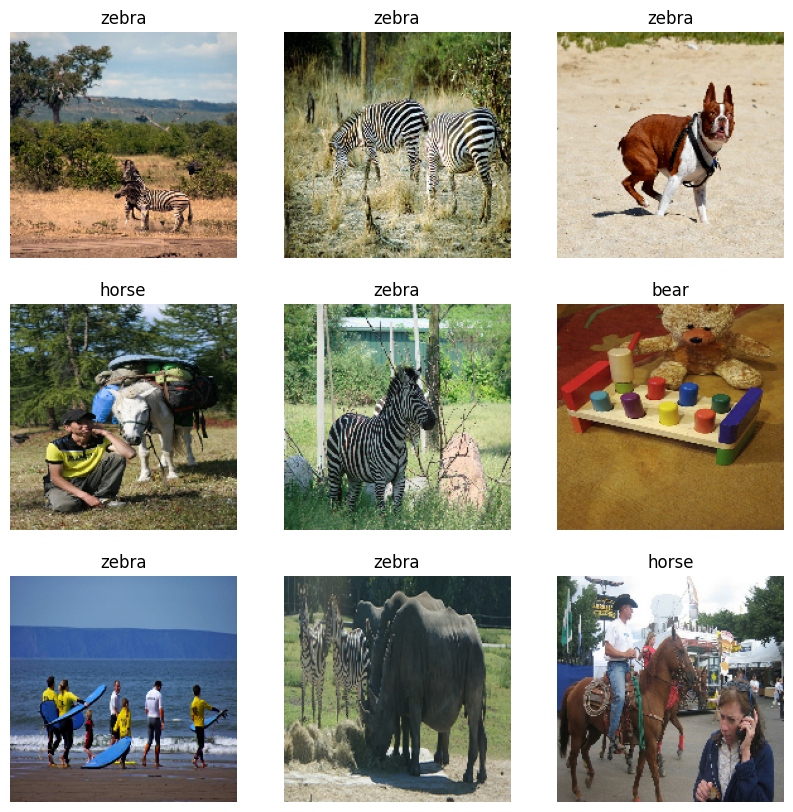

In [20]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
 for i in range(9):
     ax = plt.subplot(3, 3, i + 1)
     plt.imshow(images[i].numpy().astype("uint8"))
     plt.title(class_names[labels[i]])
     plt.axis("off")
    
for image_batch, labels_batch in train_ds:
     print(image_batch.shape)
     print(labels_batch.shape)
     break

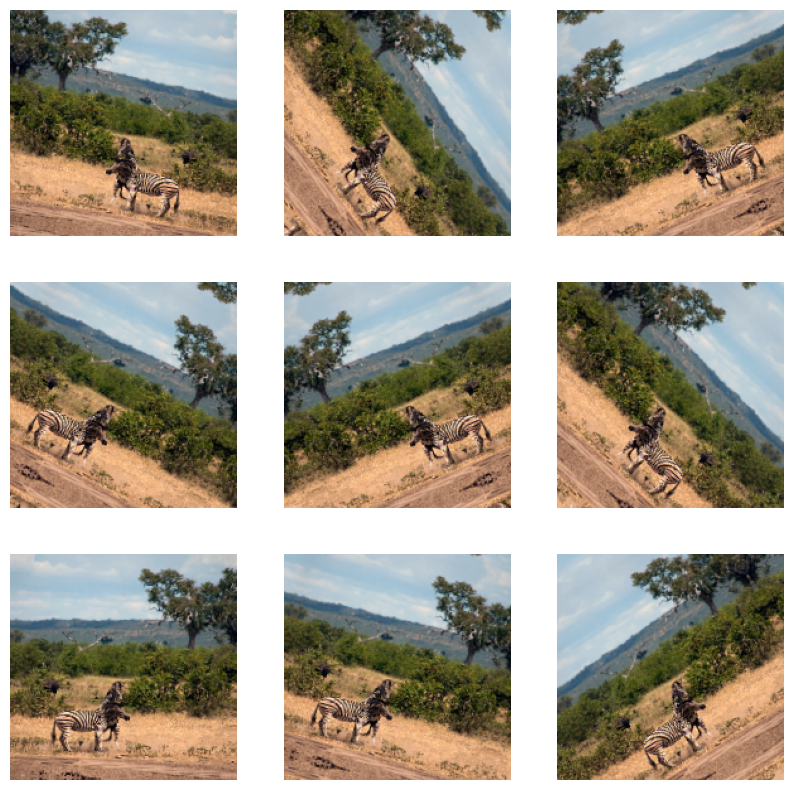

In [24]:
# Data Augumentation

data_augmentation = tf.keras.Sequential([
 tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
 tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

for image, _ in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')


In [26]:
model = Sequential([
 layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height,
img_width, 3)),
layers.experimental.preprocessing.RandomFlip('horizontal'),
layers.experimental.preprocessing.RandomRotation(0.2),    
 layers.Conv2D(16, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(32, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Conv2D(64, 3, padding='same', activation='relu'),
 layers.MaxPooling2D(),
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(num_classes)
])


model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 random_flip_4 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_4 (RandomRo  (None, 180, 180, 3)      0         
 tation)                                                         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 32)       

In [27]:
epochs=10
history = model.fit(
 train_ds,
 validation_data=val_ds,
 epochs=epochs)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

Epoch 1/10
61/61 [==============================] - 2s 29ms/step - loss: 1.0649 - accuracy: 0.4456 - val_loss: 1.0119 - val_accuracy: 0.4318
Epoch 2/10
61/61 [==============================] - 2s 26ms/step - loss: 0.9426 - accuracy: 0.5508 - val_loss: 0.8639 - val_accuracy: 0.5971
Epoch 3/10
61/61 [==============================] - 2s 25ms/step - loss: 0.8238 - accuracy: 0.6307 - val_loss: 0.8173 - val_accuracy: 0.6570
Epoch 4/10
61/61 [==============================] - 2s 26ms/step - loss: 0.8145 - accuracy: 0.6256 - val_loss: 0.8435 - val_accuracy: 0.6074
Epoch 5/10
61/61 [==============================] - 2s 26ms/step - loss: 0.7773 - accuracy: 0.6653 - val_loss: 0.8484 - val_accuracy: 0.6219
Epoch 6/10
61/61 [==============================] - 2s 26ms/step - loss: 0.7840 - accuracy: 0.6524 - val_loss: 0.7558 - val_accuracy: 0.6715
Epoch 7/10
61/61 [==============================] - 2s 26ms/step - loss: 0.7451 - accuracy: 0.6715 - val_loss: 0.7515 - val_accuracy: 0.6591
Epoch 8/10
61

In [31]:
IMG_SIZE = (180, 180)

IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
 include_top=False,
 weights='imagenet')

image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

9406464/9406464 [==============================] - 0s 0us/step
(32, 6, 6, 1280)


In [32]:
base_model.trainable = False
base_model.summary()
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 90, 90, 32)   864         ['input_4[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 90, 90, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 90, 90, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 23, 23, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 23, 23, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 23, 23, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 23, 23, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 12, 12, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 12, 12, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 12, 12, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 12, 12, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 12, 12, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 12, 12, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 12, 12, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 6, 6, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 6, 6, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 6, 6, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 6, 6, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [33]:
prediction_layer = tf.keras.layers.Dense(3)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 3)


In [34]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [36]:
inputs = tf.keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),

loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
 metrics=['accuracy'])

model.summary()
len(model.trainable_variables)
initial_epochs = 10
loss0, accuracy0 = model.evaluate(val_ds)
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))
history = model.fit(train_ds,
 epochs=initial_epochs,
 validation_data=val_ds)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_6 (Sequential)   (None, None, None, 3)     0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 180, 180, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 180, 180, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                           

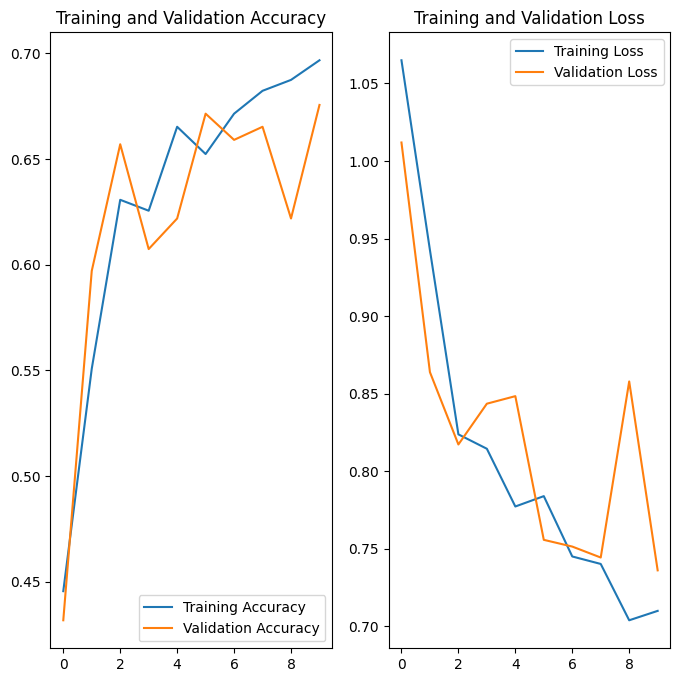

In [39]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()